In [1]:
import itertools
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from random import shuffle

from sklearn.metrics import confusion_matrix
from tools import plot_confusion_matrix

In [2]:
def read_data(filename="datasets/breast-cancer-wisconsin.data"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            row.pop(0) #removing the id from each entry
            for i in range(len(row)):
                if row[i] == '?':
                    row[i] = 0
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y

x,y = read_data()

for i in range(len(y)):
    if y[i] == [2]:
        y[i] = 0
    if y[i] == [4]:
        y[i] = 1

In [3]:
svm = SVC(C=0.1, kernel='rbf', gamma=0.01) #Parameters found via GRIDSEARCHSC function

def shuffle_data(x, y):
    combined = list(zip(x, y))
    shuffle(combined)
    return zip(*combined)

x,y = shuffle_data(x,y)

def split_data(x, y, train_ratio=0.8):
    pivot = int(train_ratio * len(x))
    return x[:pivot], x[pivot:], y[:pivot], y[pivot:]

x_train, x_test, y_train, y_test = split_data(x, y)    

svm.fit(x_train, y_train)

accuracy = svm.score(x_train, y_train)
print('SVM accuracy on training data: {:.2f}'.format(accuracy*100),'%')

accuracy = svm.score(x_test, y_test)
print('SVM accuracy on test data: {:.2f}'.format(accuracy*100),'%')

SVM accuracy on training data: 96.96 %
SVM accuracy on test data: 96.43 %


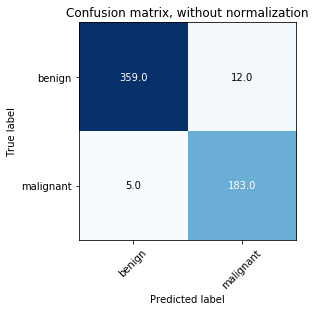

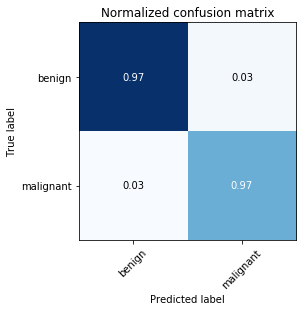

In [4]:
svm_train_predictions = svm.fit(x_train, y_train).predict(x_train)
confusion_matrix = np.zeros((2, 2))

for true_label, predicted_label in zip(y_train, svm_train_predictions):
    confusion_matrix[true_label][predicted_label] += 1
   
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['benign','malignant'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['benign','malignant'], normalize=True, title='Normalized confusion matrix')


plt.show()

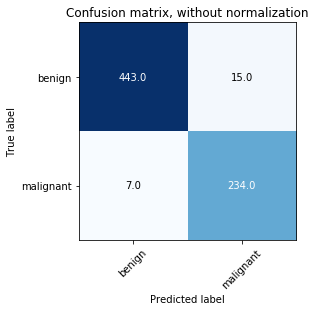

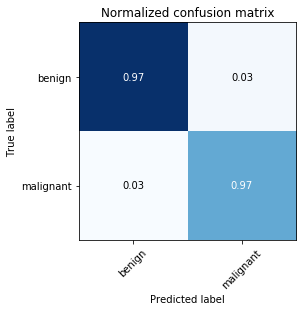

In [5]:
svm_test_prediction = svm.fit(x_train, y_train).predict(x_test)
#confusion_matrix = np.zeros((2, 2))

for true_label, predicted_label in zip(y_test, svm_test_prediction):
    confusion_matrix[true_label][predicted_label] += 1
   
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['benign','malignant'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['benign','malignant'], normalize=True, title='Normalized confusion matrix')


plt.show()

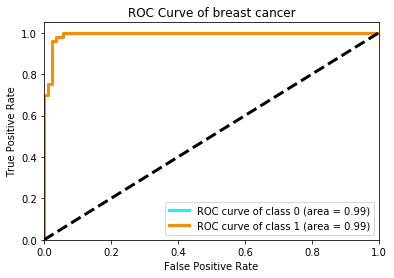

In [6]:
y_score = svm.fit(x_train, y_train).decision_function(x_test)

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

from itertools import cycle
plt.figure()
lw=3

colors = cycle(['aqua', 'darkorange'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    

fpr1, tpr1, _ = roc_curve(y_test, svm_test_prediction)
roc_auc1 = auc(fpr1, tpr1)
    
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of breast cancer')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

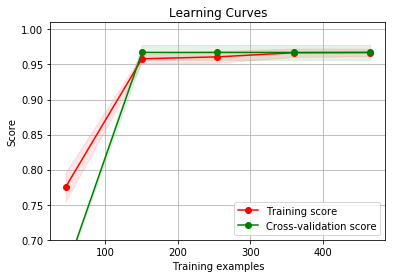

In [7]:
from tools import plot_learning_curve

plot_learning_curve(svm, 'Learning Curves', x, y, (0.7, 1.01),cv=3, n_jobs=4)
plt.show()

In [8]:
predictions = svm.fit(x_train, y_train).predict(x_train)

t_p = 0
t_n = 0
f_p = 0
f_n = 0 
for i in range(len(y_train)):
    if predictions[i] == y_train[i]:
        if predictions[i] == 1:
            t_p += 1
        else:
            t_n += 1
    else:
        if predictions[i] == 1:
            f_p += 1
        else:
            f_n += 1

print('sensitivity = ' , t_p/(t_p + f_n))
print('specificity = ' , t_n/(t_n + f_p)) 
print('precision = ' , t_p/(t_p + f_p))
print('recall = ' , t_p/(t_p + f_n))

sensitivity =  0.973404255319149
specificity =  0.967654986522911
precision =  0.9384615384615385
recall =  0.973404255319149


In [9]:
predictions = svm.fit(x_train, y_train).predict(x_test)

t_p = 0
t_n = 0
f_p = 0
f_n = 0 
for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        if predictions[i] == 1:
            t_p += 1
        else:
            t_n += 1
    else:
        if predictions[i] == 1:
            f_p += 1
        else:
            f_n += 1

print('sensitivity = ' , t_p/(t_p + f_n))
print('specificity = ' , t_n/(t_n + f_p)) 
print('precision = ' , t_p/(t_p + f_p))
print('recall = ' , t_p/(t_p + f_n))

sensitivity =  0.9622641509433962
specificity =  0.9655172413793104
precision =  0.9444444444444444
recall =  0.9622641509433962
